In [27]:
%pip install neuralforecast
%pip install tsfresh
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS,RNN,LSTM
from neuralforecast.tsdataset import TimeSeriesDataset
from neuralforecast.utils import AirPassengersDF as Y_df

# Split train/test and declare time series dataset
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31']   # 12 test
dataset, *_ = TimeSeriesDataset.from_df(Y_train_df)



models = NeuralForecast(
    models = [NBEATS(input_size=24, h=12, max_steps=100)],
    freq = 'M'
),



models[0].fit(df=Y_train_df)
prediction = models[0].predict()



Seed set to 1
2024-02-10 18:19:36.228261: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 18:19:36.228413: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 18:19:36.248575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-10 18:19:36.303939: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-10 18:19:37.250633: W tensorflo

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 89.91it/s]


In [50]:
prediction

,ds,NBEATS
unique_id,,
1.0,1959-12-31 01:00:00,419.868134
1.0,1959-12-31 02:00:00,399.968750
1.0,1959-12-31 03:00:00,473.787018
1.0,1959-12-31 04:00:00,464.958038
1.0,1959-12-31 05:00:00,469.063538
1.0,1959-12-31 06:00:00,552.311829
1.0,1959-12-31 07:00:00,631.841675
1.0,1959-12-31 08:00:00,631.967651
1.0,1959-12-31 09:00:00,540.857910


In [5]:
import matplotlib.pyplot as plt


Y_df.plot(x='ds', y='y', kind='line', label='Dataframe 1', ax=plt.gca())

prediction.plot(x='ds', y='NBEATS', kind='line', label='Dataframe 2', ax=plt.gca())


plt.show()


NameError: name 'Y_df' is not defined

In [5]:

from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_features
extracted_features = extract_features(Y_train_df, column_id="unique_id", column_sort="ds")

extracted_features


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]


,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,...,y__fourier_entropy__bins_5,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,y__mean_n_absolute_max__number_of_maxima_7
1.0,1.0,0.0,0.0,1.0,34649.0,10584447.0,24.083969,2.236641,0.142308,239.5,...,0.154914,0.154914,0.674508,1.642005,2.690483,3.401101,3.910715,4.281797,NaN,501.0


In [2]:
import pandas as pd


gen_1=pd.read_csv('data/Kaggle_solar/Plant_1_Generation_Data.csv')
gen_1.drop('PLANT_ID', axis=1)
sens_1= pd.read_csv('data/Kaggle_solar/Plant_1_Weather_Sensor_Data.csv')
sens_1.drop('PLANT_ID',axis=1)
#format datetime
gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
sens_1['DATE_TIME']= pd.to_datetime(sens_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')


In [3]:
gen_1.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,2020-05-15,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,2020-05-15,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,2020-05-15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,2020-05-15,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,2020-05-15,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


In [4]:
df_gen=gen_1.groupby('DATE_TIME').sum().reset_index()
df_gen['time']=df_gen['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_gen.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy',ax=ax[0])
# AC & DC power plot
df_gen.set_index('time').drop('DATE_TIME',axis=1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[1])

ax[0].set_title('Daily yield',)
ax[1].set_title('AC power & DC power during day hours')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

NameError: name 'plt' is not defined

In [28]:
pred_gen = gen_1.copy()
pred_gen = pred_gen.groupby('DATE_TIME').sum()
pred_gen = pred_gen['DAILY_YIELD'].reset_index()
pred_gen.rename(columns={'DAILY_YIELD': 'y', 'DATE_TIME': 'ds'}, inplace=True)
pred_gen['unique_id'] = 1
pred_gen.head()
pred_gen.count()

ds           3158
y            3158
unique_id    3158
dtype: int64

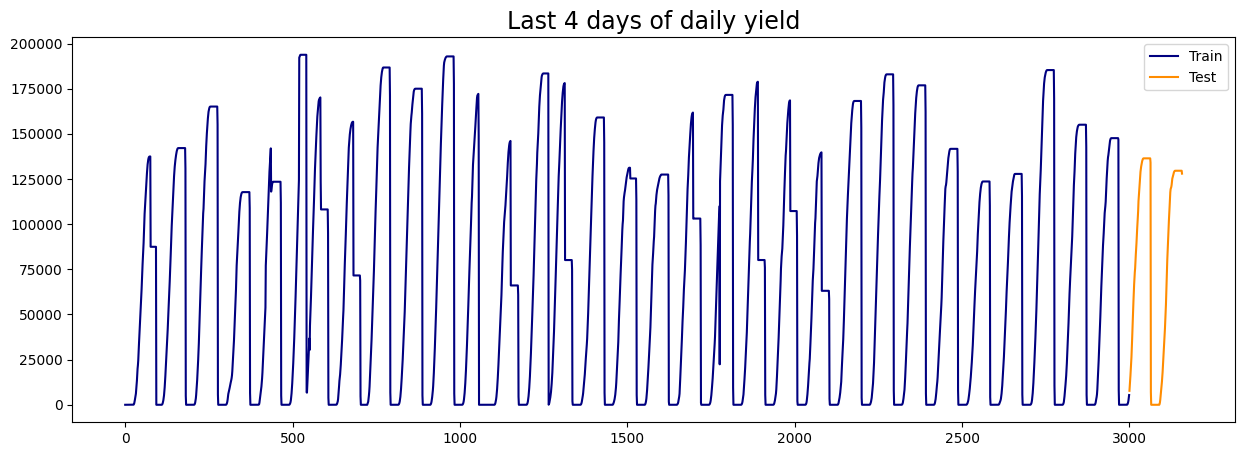

In [30]:
train=pred_gen[:3000]
test=pred_gen[3000:]
plt.figure(figsize=(15,5))
plt.plot(train['y'],label='Train',color='navy')
plt.plot(test['y'],label='Test',color='darkorange')
plt.title('Last 4 days of daily yield',fontsize=17)
plt.legend()
plt.show()

In [31]:
train


,ds,y,unique_id
0,2020-05-15 00:00:00,0.000000,1
1,2020-05-15 00:15:00,0.000000,1
2,2020-05-15 00:30:00,0.000000,1
3,2020-05-15 00:45:00,0.000000,1
4,2020-05-15 01:00:00,0.000000,1
...,...,...,...
2995,2020-06-16 06:45:00,712.553571,1
2996,2020-06-16 07:00:00,1353.714286,1
2997,2020-06-16 07:15:00,2338.607143,1
2998,2020-06-16 07:30:00,3793.625000,1


In [41]:
from neuralforecast.models import NBEATS,RNN,LSTM


models = [NBEATS(input_size=48, h=48, max_steps=50)]
nf = NeuralForecast(models=models, freq='H')
nf.fit(df=train)
Y_hat_df = nf.predict()


Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 134.39it/s]


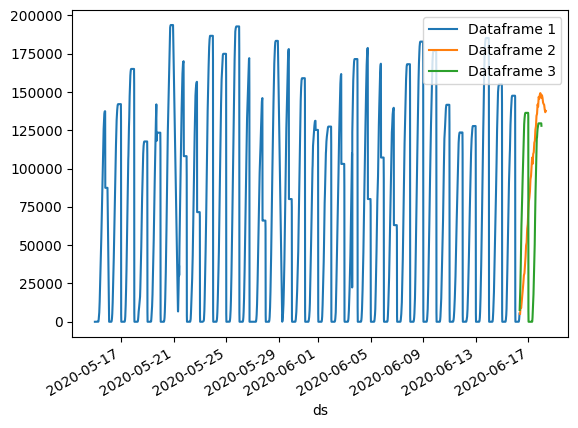

In [44]:
import matplotlib.pyplot as plt


train.plot(x='ds', y='y', kind='line', label='Dataframe 1', ax=plt.gca())

Y_hat_df.plot(x='ds', y='NBEATS', kind='line', label='Dataframe 2', ax=plt.gca())

test.plot(x='ds', y='y', kind='line', label='Dataframe 3', ax=plt.gca())
plt.show()
